# RNN

In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

2.4.0


## SimpleRNN
* 연속된 숫자 4개를 입력으로 다음에 올 수를 예측하는 모델
- 데이터가 많아도 학습량이 증가되지 않을 수 있다. -> LSTM

In [3]:
# 데이터 생성
X = []
y = []
for i in range(6):
  _list = list(range(i, i+4))
  X.append(list(map(lambda c : [c / 10], _list)))
  y.append((i+4) / 10)

In [4]:
# 데이터 변환(numpy)
X = np.array(X)
y = np.array(y)
for i in range(len(X)):
  print(X[i], y[i])

[[0. ]
 [0.1]
 [0.2]
 [0.3]] 0.4
[[0.1]
 [0.2]
 [0.3]
 [0.4]] 0.5
[[0.2]
 [0.3]
 [0.4]
 [0.5]] 0.6
[[0.3]
 [0.4]
 [0.5]
 [0.6]] 0.7
[[0.4]
 [0.5]
 [0.6]
 [0.7]] 0.8
[[0.5]
 [0.6]
 [0.7]
 [0.8]] 0.9


In [5]:
# 예측 모델
model = tf.keras.Sequential([
  tf.keras.layers.SimpleRNN(units=12, activation='tanh', return_sequences=False, input_shape=[4,1]),
  tf.keras.layers.Dense(1)
])

In [6]:
model.compile(loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 12)                168       
_________________________________________________________________
dense (Dense)                (None, 1)                 13        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.fit(X, y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.1740
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1105
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 0.0763
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 0.0539
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 0.0383
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 0.0271
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 0.0190
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 0.0131
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 0.0089
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 0.0060
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - loss: 0.0039
Epoch 12/100
1/1 [==============================] - 0s 5ms/step - loss: 0.0025
Epoch 13/100
1/1 [==============================] - 0s 6ms/ste

In [8]:
print(model.predict(X))

[[0.39973396]
 [0.5140985 ]
 [0.6226427 ]
 [0.7241087 ]
 [0.81758124]
 [0.9024737 ]]


## LSTM, GRU

In [9]:
# 데이터 생성
X = []
y = []
for i in range(3000):
  _list = np.random.rand(100)
  idx = np.random.choice(100, 2, replace = False)
  zeros = np.zeros(100)
  zeros[idx] = 1
  X.append(np.array(list(zip(zeros, _list))))
  y.append(np.prod(_list[idx]))

In [10]:
# 한번에 다바꿔야 np.array가 된다
X = np.array(X)
y = np.array(y)

- SimpleRNN을 이용한 100개 중 2개의 곱셈 결과 예측

In [11]:
# 예측 모델
# return_sequences = True로 바꿔서 중간 결과를 반영하자
# 1. 마지막 결과만 반영할 때 - return_sequences = False
# 2. 만약에, many-to-many 문제는 return_sequences = True
model = tf.keras.Sequential([
  tf.keras.layers.SimpleRNN(units = 30, activation = 'tanh', return_sequences = True, input_shape = [100, 2]),
  tf.keras.layers.SimpleRNN(units = 30),
  tf.keras.layers.Dense(1)
])

model.compile(loss = 'mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 100, 30)           990       
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 30)                1830      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 2,851
Trainable params: 2,851
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(X[:2500], y[:2500], epochs = 100, validation_split = 0.2)

Epoch 1/100
63/63 [==============================] - 8s 108ms/step - loss: 0.1524 - val_loss: 0.0599
Epoch 2/100
63/63 [==============================] - 6s 100ms/step - loss: 0.0509 - val_loss: 0.0550
Epoch 3/100
63/63 [==============================] - 6s 100ms/step - loss: 0.0507 - val_loss: 0.0547
Epoch 4/100
63/63 [==============================] - 6s 100ms/step - loss: 0.0496 - val_loss: 0.0649
Epoch 5/100
63/63 [==============================] - 6s 101ms/step - loss: 0.0485 - val_loss: 0.0576
Epoch 6/100
63/63 [==============================] - 6s 101ms/step - loss: 0.0498 - val_loss: 0.0542
Epoch 7/100
63/63 [==============================] - 6s 100ms/step - loss: 0.0494 - val_loss: 0.0550
Epoch 8/100
63/63 [==============================] - 6s 100ms/step - loss: 0.0501 - val_loss: 0.0559
Epoch 9/100
63/63 [==============================] - 6s 101ms/step - loss: 0.0507 - val_loss: 0.0540
Epoch 10/100
63/63 [==============================] - 6s 102ms/step - loss: 0.0529 - val_lo

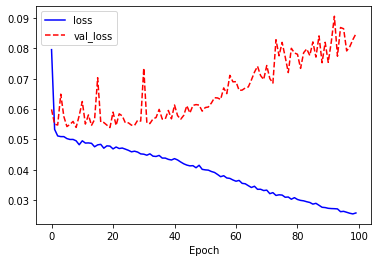

In [15]:
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [16]:
prediction = model.predict(X[2500:])
fail = 0
for i in range(len(prediction)):
  if abs(prediction[i][0] - y[2500 + i]) > 0.05:
    fail += 1
print((500-fail)/500*100, '%')

17.8 %


### LSTM을 사용한 곱셈 예측 문제


In [17]:
# 예측 모델
# return_sequences = True로 바꿔서 중간 결과를 반영하자
# 1. 마지막 결과만 반영할 때 - return_sequences = False
# 2. 만약에, many-to-many 문제는 return_sequences = True
model = tf.keras.Sequential([
  tf.keras.layers.LSTM(units = 30, activation = 'tanh', return_sequences = True, input_shape = [100, 2]),
  tf.keras.layers.LSTM(units = 30),
  tf.keras.layers.Dense(1)
])

model.compile(loss = 'mse')
model.summary()

model.fit(X[:2500], y[:2500], epochs = 100)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 30)           3960      
_________________________________________________________________
lstm_1 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 11,311
Trainable params: 11,311
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
79/79 [==============================] - 5s 9ms/step - loss: 0.0557
Epoch 2/100
79/79 [==============================] - 1s 8ms/step - loss: 0.0507
Epoch 3/100
79/79 [==============================] - 1s 8ms/step - loss: 0.0497
Epoch 4/100
79/79 [==============================] - 1s 8ms/step - loss: 0.0486
Epoch 5/100
79/79 [==============================] - 1s 8ms/

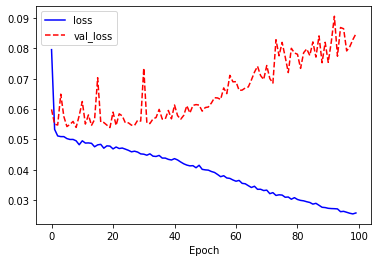

In [18]:
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [19]:
# 예측 모델
# return_sequences = True로 바꿔서 중간 결과를 반영하자
# 1. 마지막 결과만 반영할 때 - return_sequences = False
# 2. 만약에, many-to-many 문제는 return_sequences = True
model = tf.keras.Sequential([
  tf.keras.layers.LSTM(units = 30, activation = 'tanh', return_sequences = True, input_shape = [100, 2]),
  tf.keras.layers.LSTM(units = 30),
  tf.keras.layers.Dense(1)
])

model.compile(loss = 'mse')
model.summary()

model.fit(X[:2500], y[:2500], epochs = 100)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100, 30)           3960      
_________________________________________________________________
lstm_3 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 11,311
Trainable params: 11,311
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
79/79 [==============================] - 3s 9ms/step - loss: 0.0522
Epoch 2/100
79/79 [==============================] - 1s 8ms/step - loss: 0.0517
Epoch 3/100
79/79 [==============================] - 1s 8ms/step - loss: 0.0493
Epoch 4/100
79/79 [==============================] - 1s 8ms/step - loss: 0.0508
Epoch 5/100
79/79 [==============================] - 1s 8ms/

### GRU를 사용한 곱셈 예측 문제


In [20]:
# 예측 모델
# return_sequences = True로 바꿔서 중간 결과를 반영하자
# 1. 마지막 결과만 반영할 때 - return_sequences = False
# 2. 만약에, many-to-many 문제는 return_sequences = True
model = tf.keras.Sequential([
  tf.keras.layers.GRU(units = 30, activation = 'tanh', return_sequences = True, input_shape = [100, 2]),
  tf.keras.layers.GRU(units = 30),
  tf.keras.layers.Dense(1)
])

model.compile(loss = 'mse')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 100, 30)           3060      
_________________________________________________________________
gru_1 (GRU)                  (None, 30)                5580      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 31        
Total params: 8,671
Trainable params: 8,671
Non-trainable params: 0
_________________________________________________________________


In [21]:
history = model.fit(X[:2500], y[:2500], epochs = 100, validation_split = 0.2)

Epoch 1/100
63/63 [==============================] - 3s 20ms/step - loss: 0.0521 - val_loss: 0.0553
Epoch 2/100
63/63 [==============================] - 1s 12ms/step - loss: 0.0460 - val_loss: 0.0548
Epoch 3/100
63/63 [==============================] - 1s 12ms/step - loss: 0.0485 - val_loss: 0.0534
Epoch 4/100
63/63 [==============================] - 1s 12ms/step - loss: 0.0468 - val_loss: 0.0535
Epoch 5/100
63/63 [==============================] - 1s 12ms/step - loss: 0.0465 - val_loss: 0.0548
Epoch 6/100
63/63 [==============================] - 1s 12ms/step - loss: 0.0485 - val_loss: 0.0555
Epoch 7/100
63/63 [==============================] - 1s 12ms/step - loss: 0.0464 - val_loss: 0.0540
Epoch 8/100
63/63 [==============================] - 1s 12ms/step - loss: 0.0476 - val_loss: 0.0533
Epoch 9/100
63/63 [==============================] - 1s 12ms/step - loss: 0.0492 - val_loss: 0.0545
Epoch 10/100
63/63 [==============================] - 1s 12ms/step - loss: 0.0456 - val_loss: 0.0532

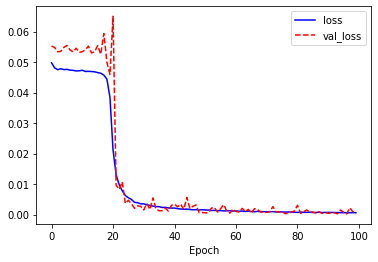

In [22]:
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [23]:
prediction = model.predict(X[2500:])
fail = 0
for i in range(len(prediction)):
  if abs(prediction[i][0] - y[2500+i]) > 0.05:
    fail += 1
print((500-fail) / 500 * 100, '%')

95.0 %


- LSTM과 GRU가 성능차이는 별로 나지 않더라.
- 그러면 시간차이는?

### Embedding